In [1]:
import numpy as np
import script
import pylab as plt
import morphsnakes.morphsnakes as morphsnakes

In [2]:
import mayavi

In [3]:
planes = np.load('planes.npy')

In [31]:
PathDicoms = np.array(
    [['/Volumes/Backup Data/ASDH Samples/Sample1/Post-operative/R-N11-109/HeadSpi  1.0  J40s  3', 'Sample 1'],
     ['/Volumes/Backup Data/ASDH Samples/Sample2/Original/Post-op.nii', 'Sample 2'],
     ['/Volumes/Backup Data/ASDH Samples/Sample3/Post-op', 'Sample 3'],
     ['/Volumes/Backup Data/ASDH Samples/Sample4/Post-op', 'Sample 4'],
     ['/Volumes/Backup Data/ASDH Samples/Sample5/Post-op', 'Sample 5'],
     ['/Volumes/Backup Data/ASDH Samples/SampleA/Post-op', 'Sample A'],
     ['/Volumes/Backup Data/ASDH Samples/SampleB/Post-op', 'Sample B'],
     ['/Volumes/Backup Data/ASDH Samples/SampleC/Post-op', 'Sample C'],
     ['/Volumes/Backup Data/ASDH Samples/SampleD/Post-op', 'Sample D'],
     ['/Volumes/Backup Data/ASDH Samples/SampleF/Post-op', 'Sample F'],
     ['/Volumes/Backup Data/ASDH Samples/SampleG/Post-op', 'Sample G'],
     ['/Volumes/Backup Data/ASDH Samples/SampleH/Post-op', 'Sample H'],
     ['/Volumes/Backup Data/ASDH Samples/SampleI/Post-op', 'Sample I']])

In [32]:
i = 2
PathDicom = PathDicoms[i][0]
samp = PathDicoms[i][1]

In [33]:
if PathDicom.endswith('.nii'):
    array, ConstPixelSpacing = script.nii2np()
else:
    array, ConstPixelSpacing = script.dicom2np()

In [34]:
array.shape

(512, 512, 220)

In [35]:
array = script.reshape(array, ConstPixelSpacing, 220, 160, array.shape[0], array.shape[2])

In [36]:
# smoothed
from skimage import filters
import scipy.ndimage as ndi
# local_mean = filters.gaussian(array, 1)

In [37]:
import nibabel as nib

In [51]:
# from scipy import ndimage as ndi
# mask1 = array<40
# mask2 = array>-50
# mask3 = np.multiply(mask1,mask2)

from scipy import ndimage as ndi
mask1 = array<100
mask2 = array>0
mask3 = np.multiply(mask1,mask2)
thresholded = np.multiply(local_mean,mask3)

In [53]:
local_mean = filters.gaussian(thresholded, 1)

<IPython.core.display.Javascript object>


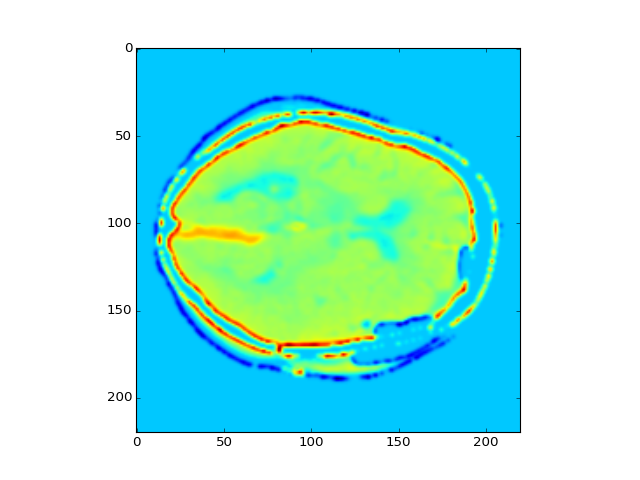

In [54]:
plt.ion()
%matplotlib nbagg
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(local_mean[:,:,80])

In [60]:
from scipy import ndimage as ndi
mask1 = array<100
mask2 = array>0
mask3 = np.multiply(mask1,mask2)
thresholded = np.multiply(local_mean,mask3)

In [62]:
img = nib.Nifti1Image(thresholded, np.eye(4))
nib.save(img, '{}.nii.gz'.format(samp))

In [63]:
img = nib.load('Sample 3.nii.gz')
# data = img.get_data() # if you want the np array

In [70]:
import nipype.interfaces.fsl as fsl

mybet = fsl.BET()
result = mybet.run(in_file='Sample-3.nii.gz', out_file='BET-Sample-3.nii.gz', frac=0.1)

In [71]:
img = nib.load('BET-Sample-3.nii.gz')
data = img.get_data() # if you want the np array

<IPython.core.display.Javascript object>


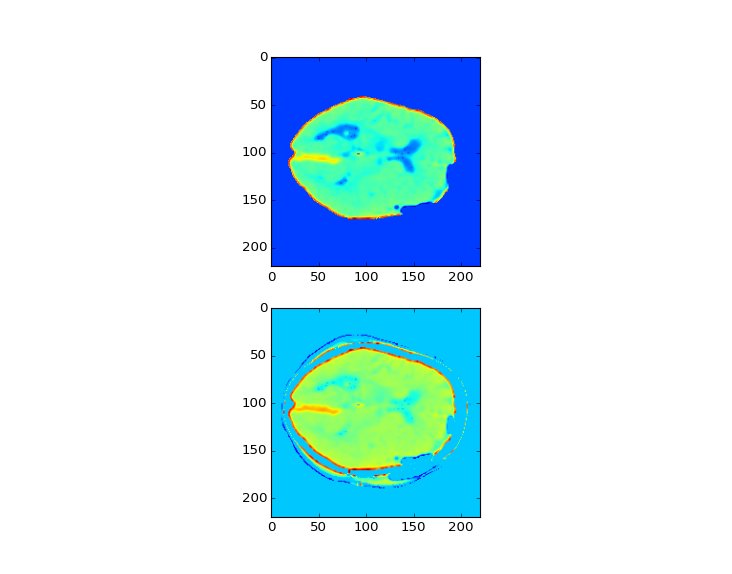

In [93]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4446187/figure/F1/
# reference FSL BET

plt.ion()
%matplotlib nbagg
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(data[:,:,80])
ax2 = fig.add_subplot(212)
ax2.imshow(thresholded[:,:,80])

In [28]:
array  = data>0

In [6]:
from skimage.morphology import watershed
from skimage.feature import peak_local_max

In [7]:
from skimage import filters
n=20
im = filters.gaussian(array, 1)

<IPython.core.display.Javascript object>


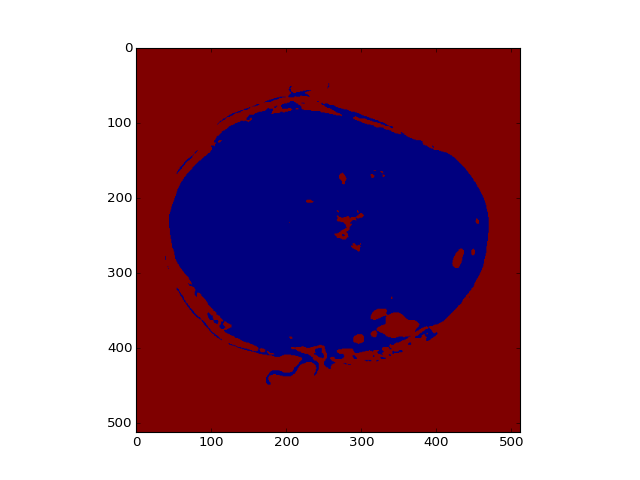

In [65]:
from scipy.ndimage.morphology import binary_erosion
output3 = binary_erosion(mask3,iterations=3)

plt.ion()
%matplotlib nbagg
# if slices == ['use eyes']:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(mask1[:,:,150])

/Users/Sinead/anaconda/envs/project/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning:

The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.



<IPython.core.display.Javascript object>


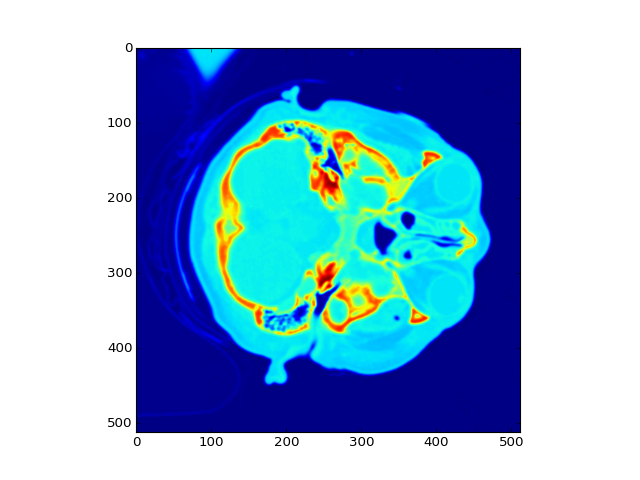

In [8]:
plt.ion()
%matplotlib nbagg
# if slices == ['use eyes']:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(im[:,:,180])

In [66]:
def circle_levelset(shape, center, sqradius, scalerow=1.0):
    """Build a binary function with a circle as the 0.5-levelset."""
    grid = np.mgrid[list(map(slice, shape))].T - center
    phi = sqradius - np.sqrt(np.sum((grid.T)**2, 0))
    u = np.float_(phi > 0)
    return u

# Morphological ACWE. Initialization of the level-set.
macwe = morphsnakes.MorphACWE(array, smoothing=0, lambda1=1, lambda2=2)
macwe.levelset = mask1.astype(int)


In [67]:
for i in range(10):
    macwe.step()

<IPython.core.display.Javascript object>


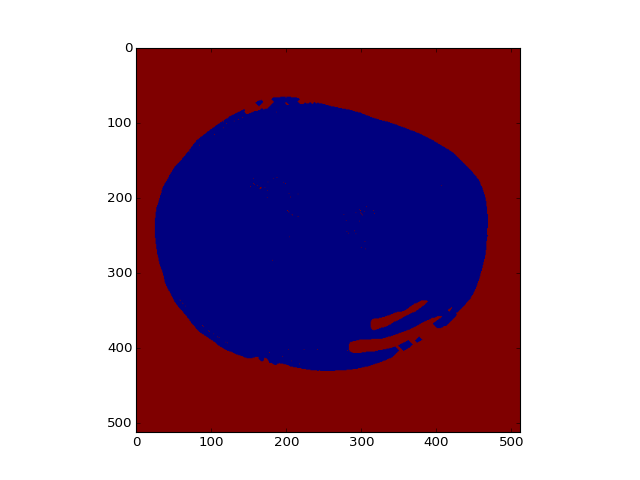

In [68]:
plt.ion()
%matplotlib nbagg
# if slices == ['use eyes']:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(macwe.levelset[:,:,100])


In [ ]:
from skimage.filters import sobel
ws=watershed(array, mask3, connectivity=None)

In [ ]:
from skimage.segmentation import random_walker
rw = random_walker(array, mask3, beta=130, mode='bf', tol=0.001, copy=True, multichannel=False, 
              return_full_prob=False, spacing=None)

In [ ]:
from skimage.segmentation import mark_boundaries
plt.ion()
%matplotlib nbagg
# if slices == ['use eyes']:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(rw[:,:,200])

In [ ]:
from scipy.ndimage.morphology import binary_erosion
# output2 = binary_erosion(mask2,iterations=2)

plt.ion()
%matplotlib nbagg
# if slices == ['use eyes']:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(output2[:,:,80])

# find largest connected region in this mask
# up to here

In [ ]:
output3=np.multiply(output2,output1)

plt.ion()
%matplotlib nbagg
# if slices == ['use eyes']:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(output3[:,:,180])

In [ ]:
plt.ion()
%matplotlib nbagg
# if slices == ['use eyes']:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(mask2[:,:,180])

In [ ]:
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(mask3)

local_maxi = peak_local_max(distance, indices=False,
                            labels=mask3, min_distance=10)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=mask3)

In [ ]:
import pylab as plt
plt.ion()
%matplotlib nbagg
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.imshow(labels[:,:,190], cmap='spectral', interpolation = 'None')
plt.show

In [ ]:
plt.ion()
%matplotlib nbagg
# if slices == ['use eyes']:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(array[:,:,180])



In [ ]:
from skimage.measure import label
labels, num_labels = label(mask3, background=None, return_num=True, connectivity=None)

In [ ]:
points = np.nonzero(mask3[:,:,100].astype(int))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib nbagg

from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(np.array(points).T)

from sklearn.cluster import DBSCAN
y_pred = DBSCAN(eps=5).fit_predict(np.array(points).T)

In [ ]:
plt.scatter(points[1], points[0], c=y_pred, marker='o')

In [ ]:
plt.ion()
%matplotlib nbagg
# if slices == ['use eyes']:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(output[:,:,180])


In [ ]:
from scipy.ndimage.morphology import binary_fill_holes
output = binary_fill_holes(mask3)

In [ ]:
label_array

In [ ]:
normalised_array = np.divide(array, np.max(array) - np.min(array))

In [ ]:
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(array)
# shifted = cv2.pyrMeanShiftFiltering(array, 21, 51)
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
localMax = peak_local_max(D, indices=False, min_distance=20)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3, 3)))[0]
labels = watershed(-D, markers)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

In [ ]:
np.ones((3, 3, 3)).shape